**SPRINT 1 OF NETWORK INRUSION DETECTION**

---



DATA VISUALIZATION

MOUNT GOOGLE DRIVE TO GOOGLE COLAB

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


IMPORT ALL NECESSARY LIBRARIES

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import random
import seaborn as sns

ATTACK_CATEGORIES PROPORTION IN THE RAW DATASET

In [ ]:

df=pd.read_csv("/content/drive/MyDrive/dataset/UNSW_NB15.csv")
# Count the number of instances for each attack_cat label and protocol.
attack_cat_protocol_counts = df.groupby(['attack_cat']).size()

# Print the count of the values in the attack_cat and protocol columns.
print(attack_cat_protocol_counts)

df.shape

attack_cat
Analysis           2000
Backdoor           1746
DoS               12264
Exploits          33393
Fuzzers           18184
Generic           40000
Normal            56000
Reconnaissance    10491
Shellcode          1133
Worms               130
dtype: int64


(175341, 45)

ATTACK_CATEGORIES PROPORTION IN THE RAW DATASET PICTORICAL REPRASENTATION

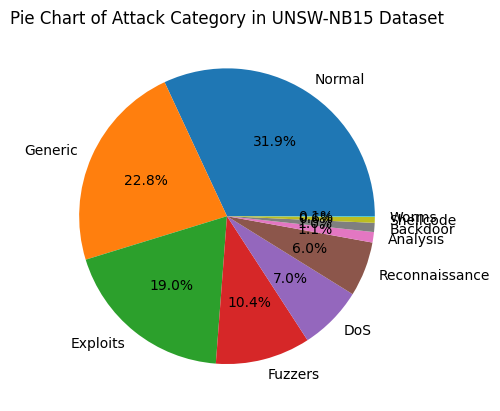

In [ ]:
# Get the attack category counts
attack_cat_counts = df['attack_cat'].value_counts()

# Create a pie chart of the attack category counts
plt.pie(attack_cat_counts.values, labels=attack_cat_counts.index, autopct="%1.1f%%")
plt.title("Pie Chart of Attack Category in UNSW-NB15 Dataset")
plt.show()

ATTACK_CATEGORIES PROPORTION IN THE RAW DATASET PICTORICAL REPRASENTAION AS NORMAL AND ATTACK

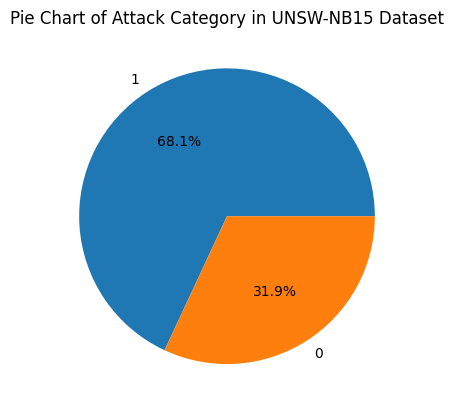

In [ ]:
# Get the attack category counts
attack_cat_counts = df['label'].value_counts()

# Create a pie chart of the attack category counts
plt.pie(attack_cat_counts.values, labels=attack_cat_counts.index, autopct="%1.1f%%")
plt.title("Pie Chart of Attack Category in UNSW-NB15 Dataset")
plt.show()

SAMPLE DATASET INFORMATION

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9504 entries, 0 to 9503
Data columns (total 48 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0.2       9504 non-null   int64  
 1   Unnamed: 0.1       9504 non-null   int64  
 2   Unnamed: 0         9504 non-null   int64  
 3   id                 9504 non-null   int64  
 4   dur                9504 non-null   float64
 5   proto              9504 non-null   object 
 6   service            9504 non-null   object 
 7   state              9504 non-null   object 
 8   spkts              9504 non-null   int64  
 9   dpkts              9504 non-null   int64  
 10  sbytes             9504 non-null   int64  
 11  dbytes             9504 non-null   int64  
 12  rate               9504 non-null   float64
 13  sttl               9504 non-null   int64  
 14  dttl               9504 non-null   int64  
 15  sload              9504 non-null   float64
 16  dload              9504 

CHECKING FOR NULL VALUES

In [ ]:
df = df.isnull()
df.shape

(9504, 48)

CHECKING MISSING VALUES AND DUPLICATE ROWS IN SAMPLE DAASET

In [ ]:

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Check data types
data_types = df.dtypes
print("Data Types:\n", data_types)

# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print("Duplicate Rows:", duplicate_rows)

# Handle missing values (e.g., drop rows with missing values)
df.dropna(inplace=True)

# Handle data type inconsistencies (if any) - convert columns to appropriate types
# For example, if a column should be categorical, use astype('category')
df['proto'] = df['proto'].astype('category')
df['service'] = df['service'].astype('category')
df['state'] = df['state'].astype('category')

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Save the consistent dataset to a new CSV file
df.to_csv("/content/drive/MyDrive/datasetconsistent_UNSW_NB15.csv", index=False)


Missing Values:
 Unnamed: 0.2         0
Unnamed: 0.1         0
Unnamed: 0           0
id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd 

In [ ]:
#df=pd.read_csv("/content/drive/MyDrive/dataset/sampled_unsw_nb15_dataset_with_attack_cat_proportions.csv")

FILLING MISSING VALUES IF MANY WITH MEAN

In [ ]:
# Decide how to handle missing values (e.g., fill or drop)
# Example: Fill missing values with the mean of the column
df = df.fillna(df.mean())


<ipython-input-14-b98cde7ce700>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


COUNT PLOT OF SAMPLE DATASET

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/dataset/sampled_unsw_nb15_dataset_equal_proportions.csv")

In [ ]:
df.columns

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'id', 'dur', 'proto',
       'service', 'state', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate',
       'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt',
       'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack',
       'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len',
       'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm',
       'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd',
       'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports',
       'attack_cat', 'label'],
      dtype='object')

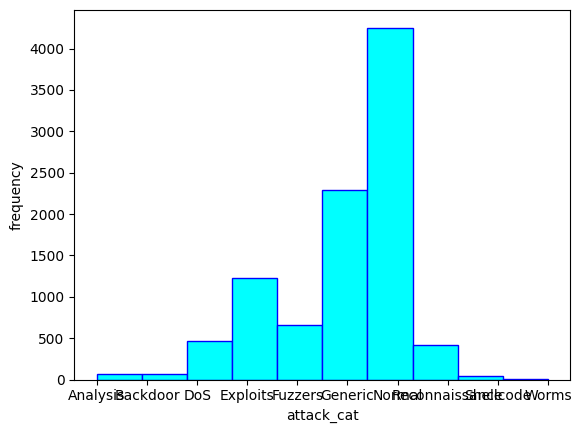

In [ ]:
plt.hist(df['attack_cat'], color="cyan", edgecolor="blue")
plt.xlabel("attack_cat")
plt.ylabel("frequency")
plt.show()

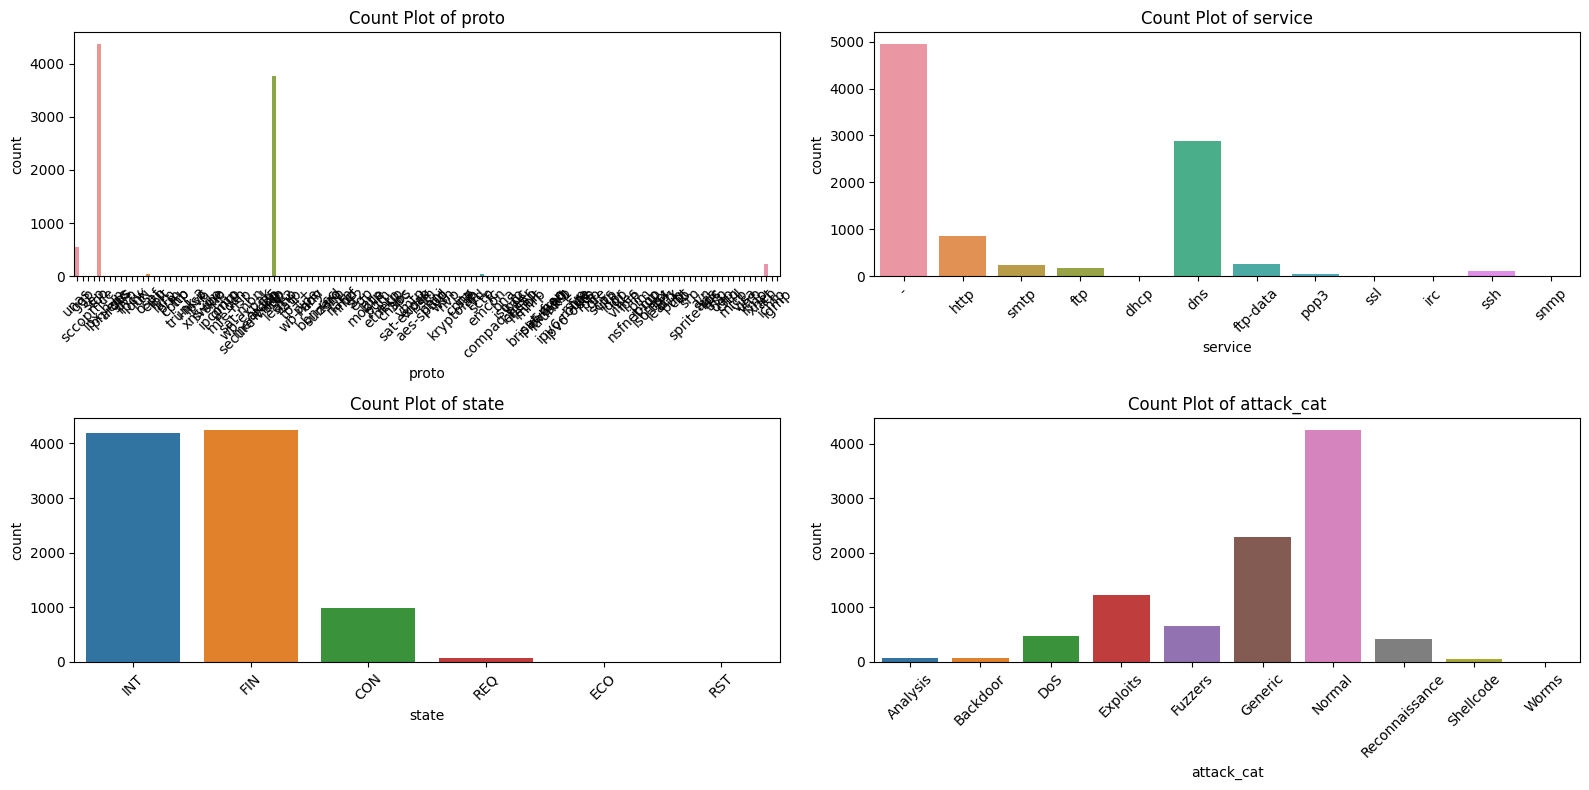

In [ ]:

# Select the four object data type columns
object_columns = ['proto', 'service', 'state', 'attack_cat']

# Create subplots for count plots
plt.figure(figsize=(16, 8))
for i, column in enumerate(object_columns, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=column)
    plt.title(f"Count Plot of {column}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

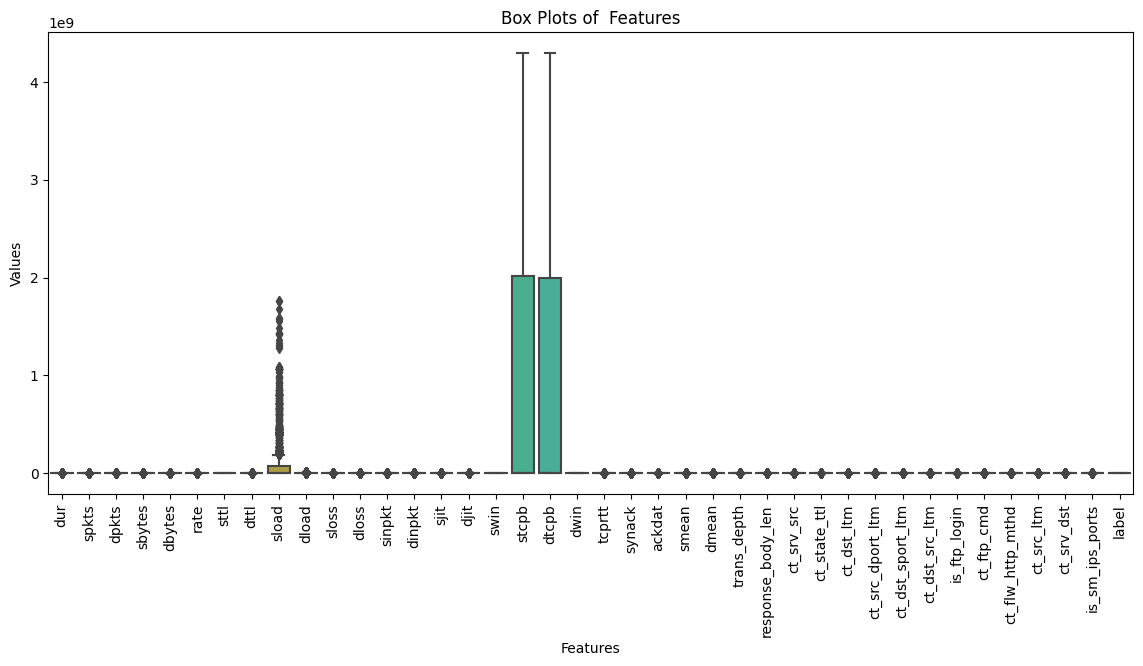

In [ ]:
feature_names=[ 'dur', 'spkts', 'dpkts', 'sbytes','dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss','sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin','tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth','response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm','ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm','is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm','ct_srv_dst', 'is_sm_ips_ports', 'label']

# Extract the  features from your dataset
top_20_data = df[feature_names]

# Create a box plot for each of the features
plt.figure(figsize=(14, 6))  # Adjust the figure size as needed
sns.boxplot(data=top_20_data)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title("Box Plots of  Features")
plt.xlabel("Features")
plt.ylabel("Values")
plt.show()